In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install hurst

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import yfinance as yahooFinance
import datetime
import statsmodels.api as sm
from scipy import stats as st
from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from hurst import compute_Hc, random_walk

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### FETCHING THE DATA for 
- WTI
- BRENT
- S&P
- NQ
- NIFTY

In [ ]:

startDate = datetime.datetime(2012, 1, 1)
endDate = datetime.datetime(2021, 12, 31)

GetFacebookInformation = yahooFinance.Ticker("CL=F")
wti = GetFacebookInformation.history(start=startDate,end=endDate)
wti = wti[["Close"]]
wti.columns = ["wti"]

GetFacebookInformation = yahooFinance.Ticker("BZ=F")
brent = GetFacebookInformation.history(start=startDate,end=endDate)
brent = brent[["Close"]]
brent.columns = ["brent"]

GetFacebookInformation = yahooFinance.Ticker("^GSPC")
sp = GetFacebookInformation.history(start=startDate,end=endDate)
sp = sp[["Close"]]
sp.columns = ["sp"]

GetFacebookInformation = yahooFinance.Ticker("NQ=F")
nq = GetFacebookInformation.history(start=startDate,end=endDate)
nq = nq[["Close"]]
nq.columns = ["nq"]

GetFacebookInformation = yahooFinance.Ticker("GC=F")
gold = GetFacebookInformation.history(start=startDate,end=endDate)
gold = gold[["Close"]]
gold.columns = ["gold"]

GetFacebookInformation = yahooFinance.Ticker("^VIX")
vix = GetFacebookInformation.history(start=startDate,end=endDate)
vix = vix[["Close"]]
vix.columns = ["vix"]

GetFacebookInformation = yahooFinance.Ticker("^NSEI")
nifty = GetFacebookInformation.history(start=startDate,end=endDate)
nifty = nifty[["Close"]]
nifty.columns = ["nifty"]


sp.head()

,sp
Date,
2012-01-03,1277.060059
2012-01-04,1277.300049
2012-01-05,1281.060059
2012-01-06,1277.810059
2012-01-09,1280.699951


In [ ]:
#dfs = [df.set_index(['profile', 'depth']) for df in [df1, df2, df3]]
dfs = [wti,brent,sp,nq,nifty,gold,vix]
df = pd.concat(dfs, axis=1)
df.head()

,wti,brent,sp,nq,nifty,gold,vix
Date,,,,,,,
2012-01-03,102.959999,112.129997,1277.060059,2316.00,4765.299805,1599.699951,22.969999
2012-01-04,103.220001,113.699997,1277.300049,2328.75,4749.649902,1611.900024,22.219999
2012-01-05,101.809998,112.739998,1281.060059,2339.50,4749.950195,1619.400024,21.480000
2012-01-06,101.559998,113.059998,1277.810059,2352.25,4754.100098,1616.099976,20.629999
2012-01-09,101.309998,112.449997,1280.699951,2346.75,4742.799805,1607.500000,21.070000


In [ ]:
# CLEANING THE DATA
df.fillna(method='ffill', inplace=True)

## CORRELATIONS of traditional indexes with oil

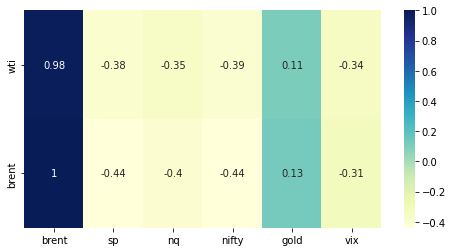

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
fx = round(df.corr().iloc[:2,1:],3)
ax = sns.heatmap(fx, annot=True,cmap="YlGnBu")

# COMMENT 1
## It can be inferred from the correlation table that the crude oil prices do not correlate significantly with traditional indices. It can be said that the nature of variation of Brent and WTI goes along with the gold prices and is opposite to the traditional indices..

In [ ]:
# normalize all the columns and plot them to see how they varied all. notice the covid drop down


In [ ]:
norm_df=(df-df.mean())/df.std()
norm_df = norm_df.reset_index()
norm_df.head()

,Date,wti,brent,sp,nq,nifty,gold,vix
0,2012-01-03,1.666661,1.552759,-1.446642,-1.141494,-1.511017,0.733563,0.872925
1,2012-01-04,1.678306,1.613973,-1.446351,-1.137908,-1.516119,0.784540,0.762202
2,2012-01-05,1.615153,1.576543,-1.441800,-1.134884,-1.516021,0.815878,0.652955
3,2012-01-06,1.603956,1.589020,-1.445734,-1.131298,-1.514668,0.802089,0.527469
4,2012-01-09,1.592758,1.565236,-1.442236,-1.132845,-1.518353,0.766155,0.592426


In [ ]:
t = df.reset_index().index

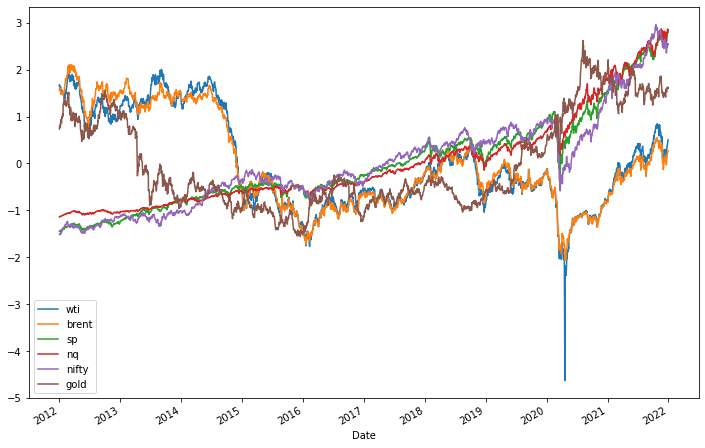

In [ ]:
norm_df.plot(x='Date', y=norm_df.columns[1:7],kind="line", figsize=(12, 8))

# COMMENT - 2
### Plot of WTI and BRENT along with other indices

In [ ]:
# plotting q-q plot of wti and brent. explain what qq plots are and what are these graphs saying.
# write their interpretations

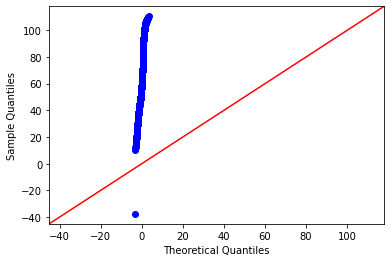

In [ ]:
# QQ PLOT FOR WTI

fig = sm.qqplot(df["wti"], line='45')
plt.show()

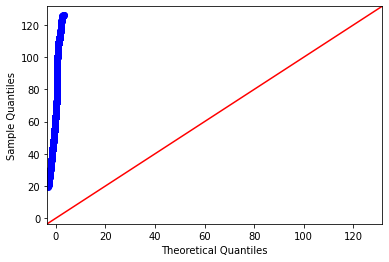

In [ ]:
# QQ PLOT FOR BRENT

fig = sm.qqplot(df["brent"], line='45')
plt.show()

# COMMENT - 3
### both are not normally distributed and skewed right.

In [ ]:
# how oil varied with volatility in the market

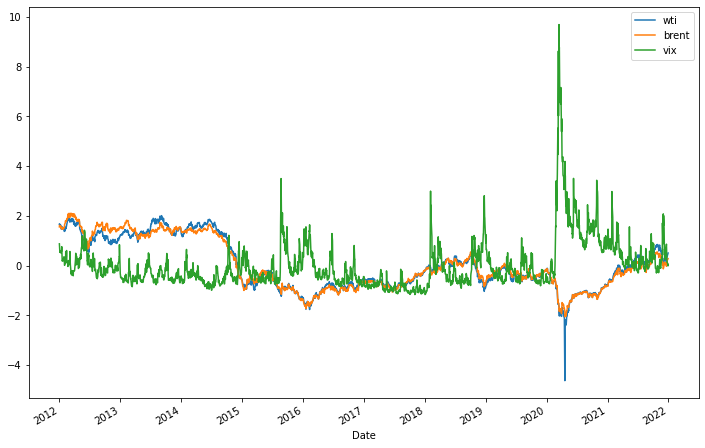

In [ ]:
norm_df.plot(x='Date', y=['wti','brent','vix'],kind="line", figsize=(12, 8))

# COMMENT - 4

In [ ]:
# Mathematical variables for 2 oil price series

In [ ]:
df.head()

,wti,brent,sp,nq,nifty,gold,vix
Date,,,,,,,
2012-01-03,102.959999,112.129997,1277.060059,2316.00,4765.299805,1599.699951,22.969999
2012-01-04,103.220001,113.699997,1277.300049,2328.75,4749.649902,1611.900024,22.219999
2012-01-05,101.809998,112.739998,1281.060059,2339.50,4749.950195,1619.400024,21.480000
2012-01-06,101.559998,113.059998,1277.810059,2352.25,4754.100098,1616.099976,20.629999
2012-01-09,101.309998,112.449997,1280.699951,2346.75,4742.799805,1607.500000,21.070000


In [ ]:
# SKEW
st.skew(df)

array([0.34495452, 0.44228572, 0.85982556, 1.19055671, 0.78277403,
       0.65559285, 3.38994207])

In [ ]:
# KURTOSIS

st.kurtosis(df)

array([-0.82919443, -1.03260658,  0.20420889,  0.56695361,  0.31708473,
       -0.92030945, 19.5595886 ])

In [ ]:
df["wti"].describe()

count    2579.000000
mean       65.749062
std        22.326637
min       -37.630001
25%        48.619999
50%        59.630001
75%        87.779999
max       110.529999
Name: wti, dtype: float64

In [ ]:
df["brent"].describe()

count    2579.000000
mean       72.304765
std        25.648038
min        19.330000
25%        51.830000
50%        65.370003
75%       101.579998
max       126.220001
Name: brent, dtype: float64

In [ ]:
# COVARIANCE

df.cov()

,wti,brent,sp,nq,nifty,gold,vix
wti,498.478710,564.006425,-7.085821e+03,-2.798619e+04,-2.667525e+04,565.124588,-50.869750
brent,564.006425,657.821834,-9.261044e+03,-3.634679e+04,-3.457959e+04,799.990815,-54.349406
sp,-7085.821441,-9261.044477,6.825301e+05,2.897521e+06,2.485639e+06,91510.890391,1171.711461
nq,-27986.186896,-36346.786205,2.897521e+06,1.264125e+07,1.039152e+07,490815.213925,7132.828010
nifty,-26675.254755,-34579.592930,2.485639e+06,1.039152e+07,9.406728e+06,278033.935302,2937.689966
gold,565.124588,799.990815,9.151089e+04,4.908152e+05,2.780339e+05,57276.014560,658.446253
vix,-50.869750,-54.349406,1.171711e+03,7.132828e+03,2.937690e+03,658.446253,45.882241


# COMMENT - 5
##  it can be deduced that WTI and BRENT have higher variance (diagonal values) than traditional indices and lower than the gold. Variance usually indicates the volatility of prices..

In [ ]:
# FINDING OUT IF THE two oil series are stationary or not
# FINDING out ARIMA paramters [ p,q,d]

In [ ]:
# FOR WTI

result = adf(df["wti"].values)
print("p value for 0 order wti series ",result[1])

result = adf(df["wti"].diff().dropna())
print("p value for 1 order wti series ",result[1])

result = adf(df["wti"].diff().diff().dropna())
print("p value for 2 order wti series ",result[1])

p value for 0 order wti series  0.3272419464528057
p value for 1 order wti series  9.965109657606132e-28
p value for 2 order wti series  1.2932168009232864e-29


we see that after first order of differnecing, WTI series got p value less than threshold. Thus we will take d=1 for wti series

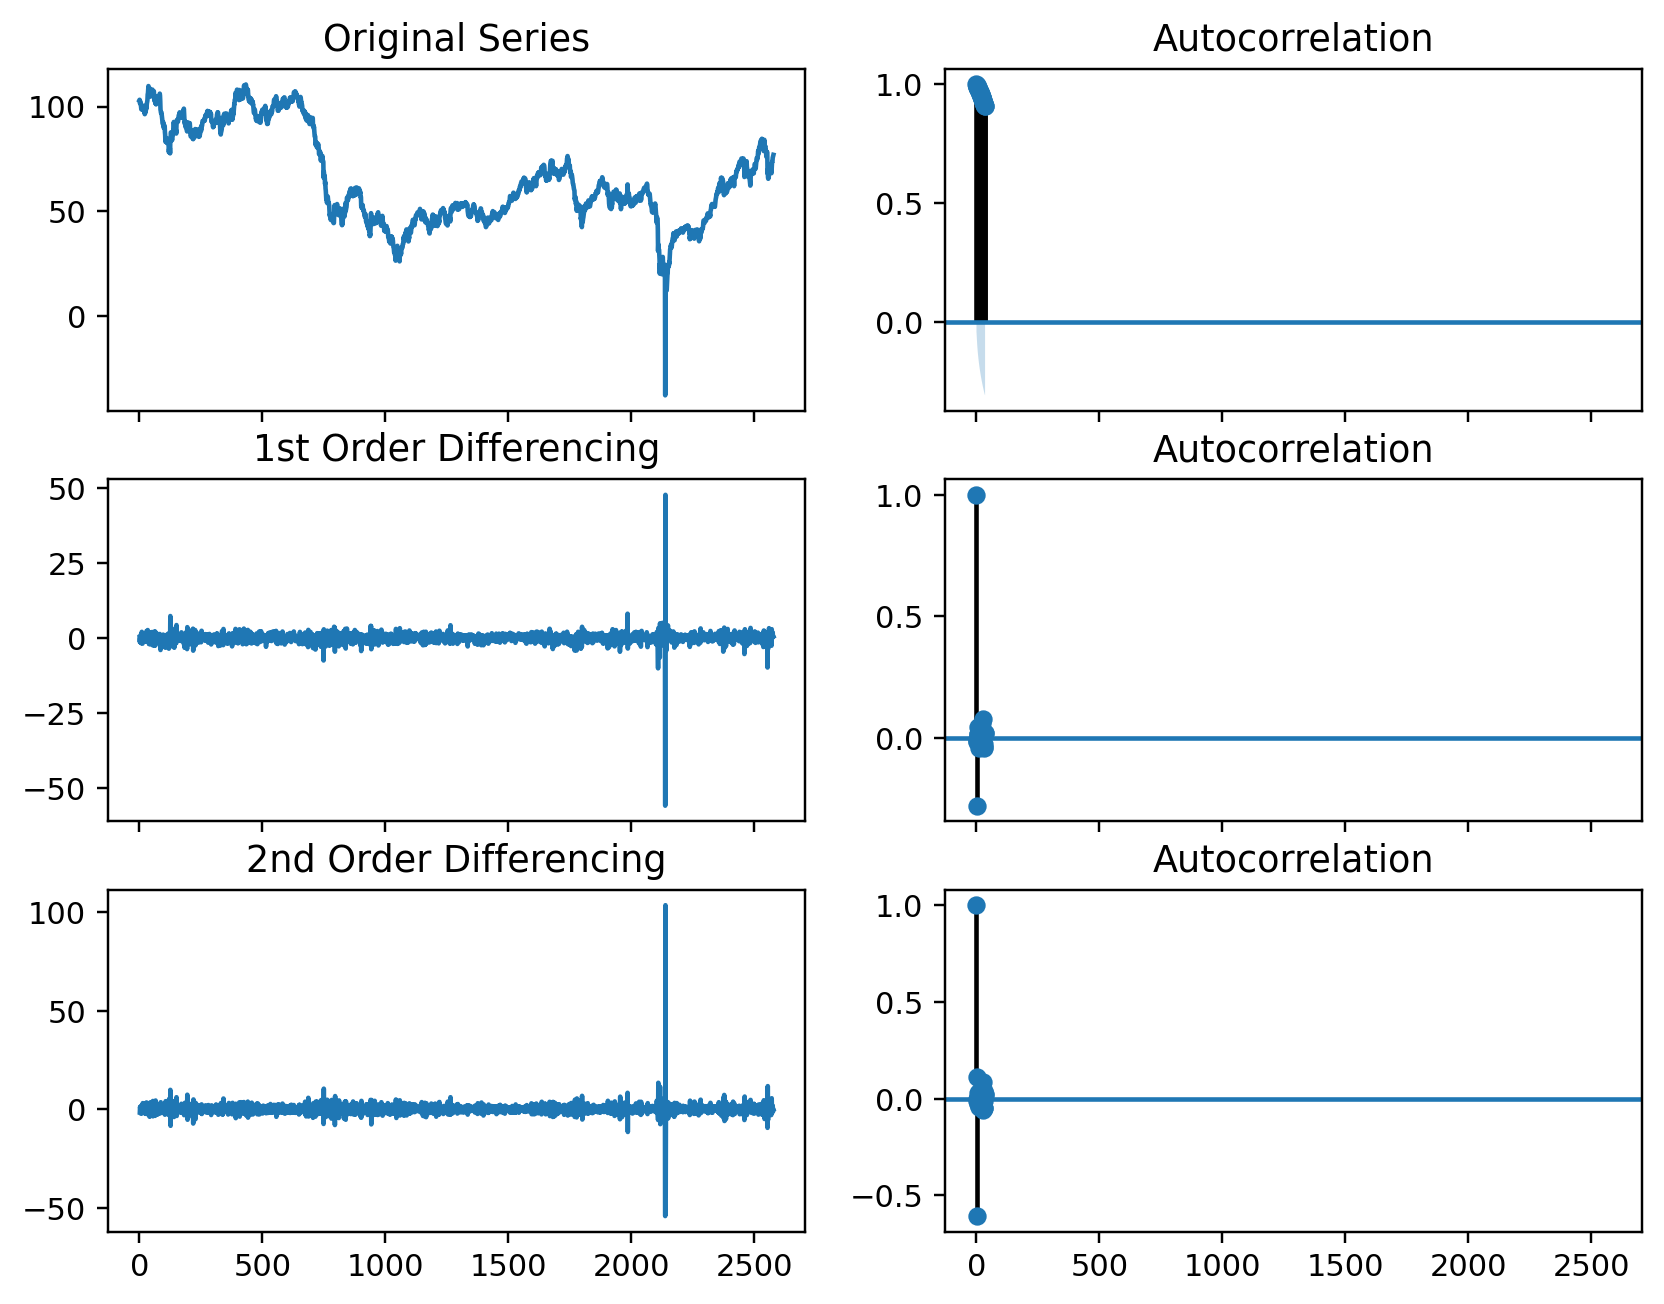

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':220})
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df["wti"].values); axes[0, 0].set_title('Original Series')
plot_acf(df["wti"].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df["wti"].diff().values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df["wti"].diff().dropna().values, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df["wti"].diff().diff().values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df["wti"].diff().diff().dropna().values, ax=axes[2, 1])

plt.show()


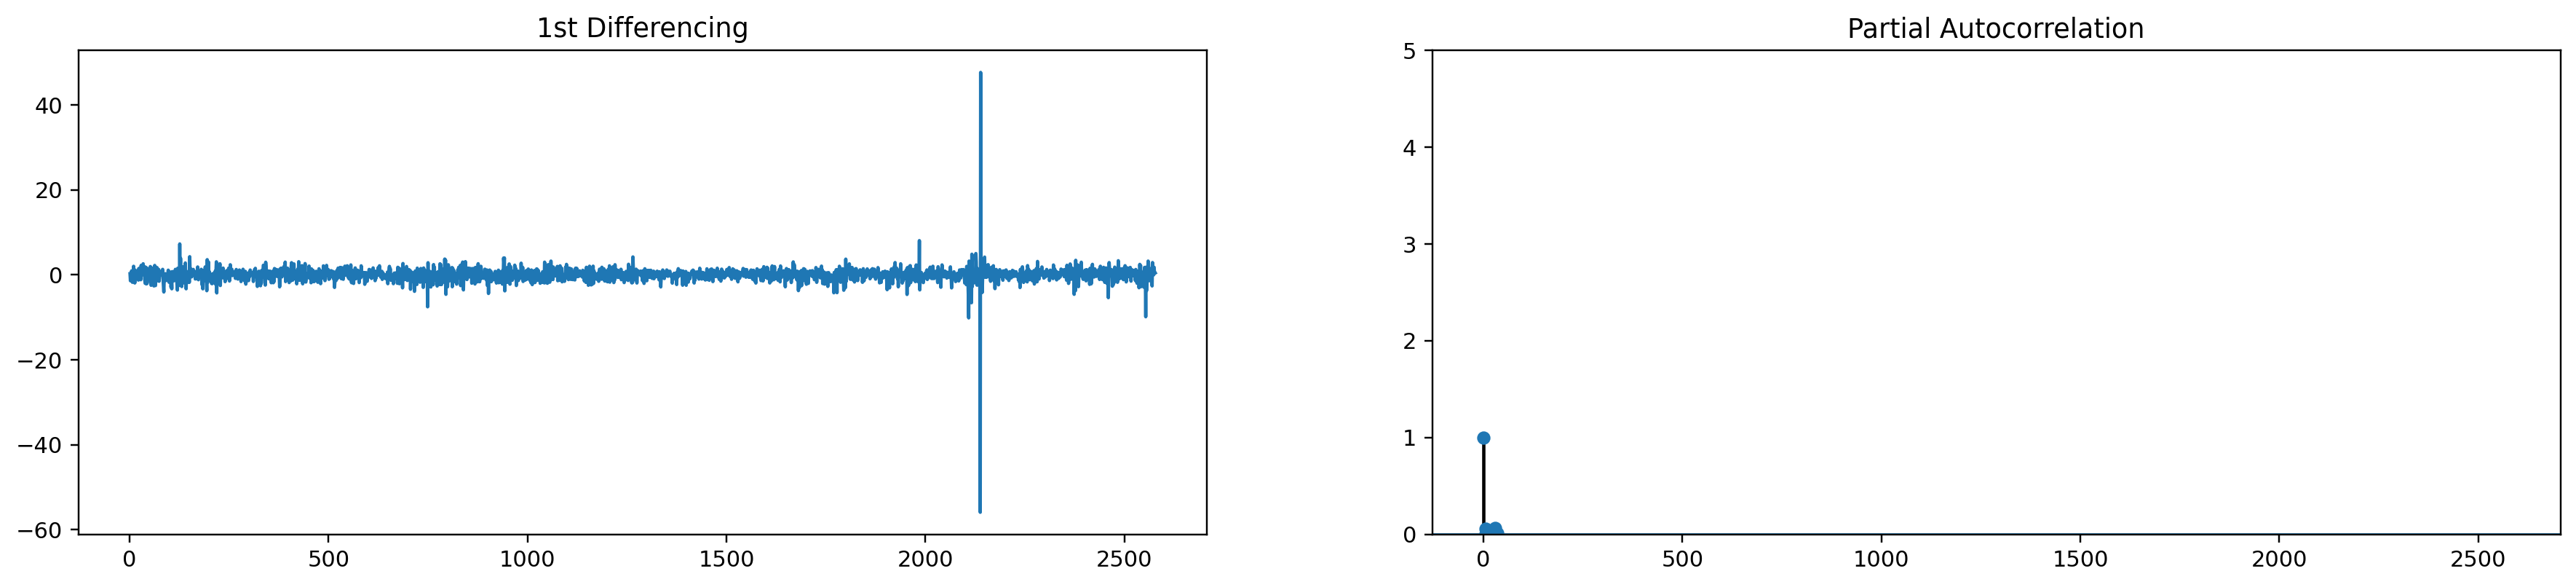

In [ ]:
plt.rcParams.update({'figure.figsize':(20,4), 'figure.dpi':220})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df["wti"].diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df["wti"].diff().dropna().values, ax=axes[1])

plt.show()

First 1 lags in the plot seems to be significant; thus p =1

In [ ]:
model = ARIMA(df["wti"].values, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2578
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5228.711
Method:                       css-mle   S.D. of innovations              1.839
Date:                Tue, 02 Aug 2022   AIC                          10465.422
Time:                        18:07:28   BIC                          10488.841
Sample:                             1   HQIC                         10473.910
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0101      0.025     -0.414      0.679      -0.058       0.038
ar.L1.D.y      0.0496      0.062      0.804      0.422      -0.071       0.171
ma.L1.D.y     -0.3570      0.058     -6.190      0.0

In [ ]:
# PLOTTING THE RESIDUALS 

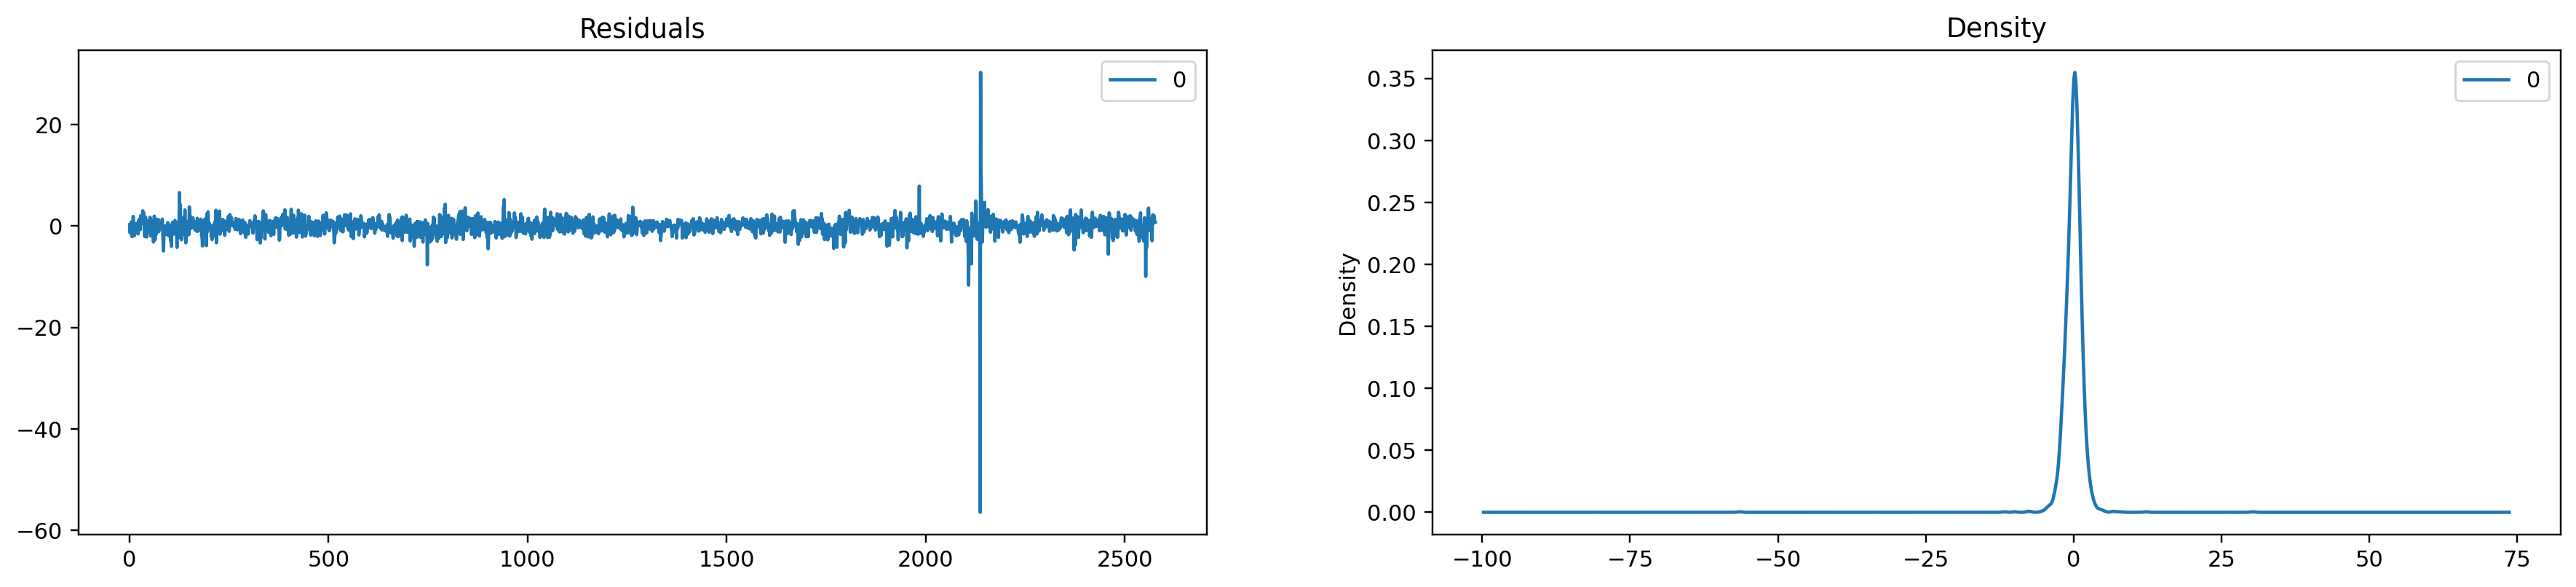

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Residuals coming out to be near 0 mean and uniform variance. means we are all good.


In [ ]:
# REPEATING THE SAME FOR BRENT

In [ ]:
result = adf(df["brent"].values)
print("p value for 0 order wti series ",result[1])

result = adf(df["brent"].diff().dropna())
print("p value for 1 order wti series ",result[1])

result = adf(df["brent"].diff().diff().dropna())
print("p value for 2 order wti series ",result[1])

p value for 0 order wti series  0.40998695187859735
p value for 1 order wti series  0.0
p value for 2 order wti series  2.2444256843301376e-30


D = 1 for the brent too!

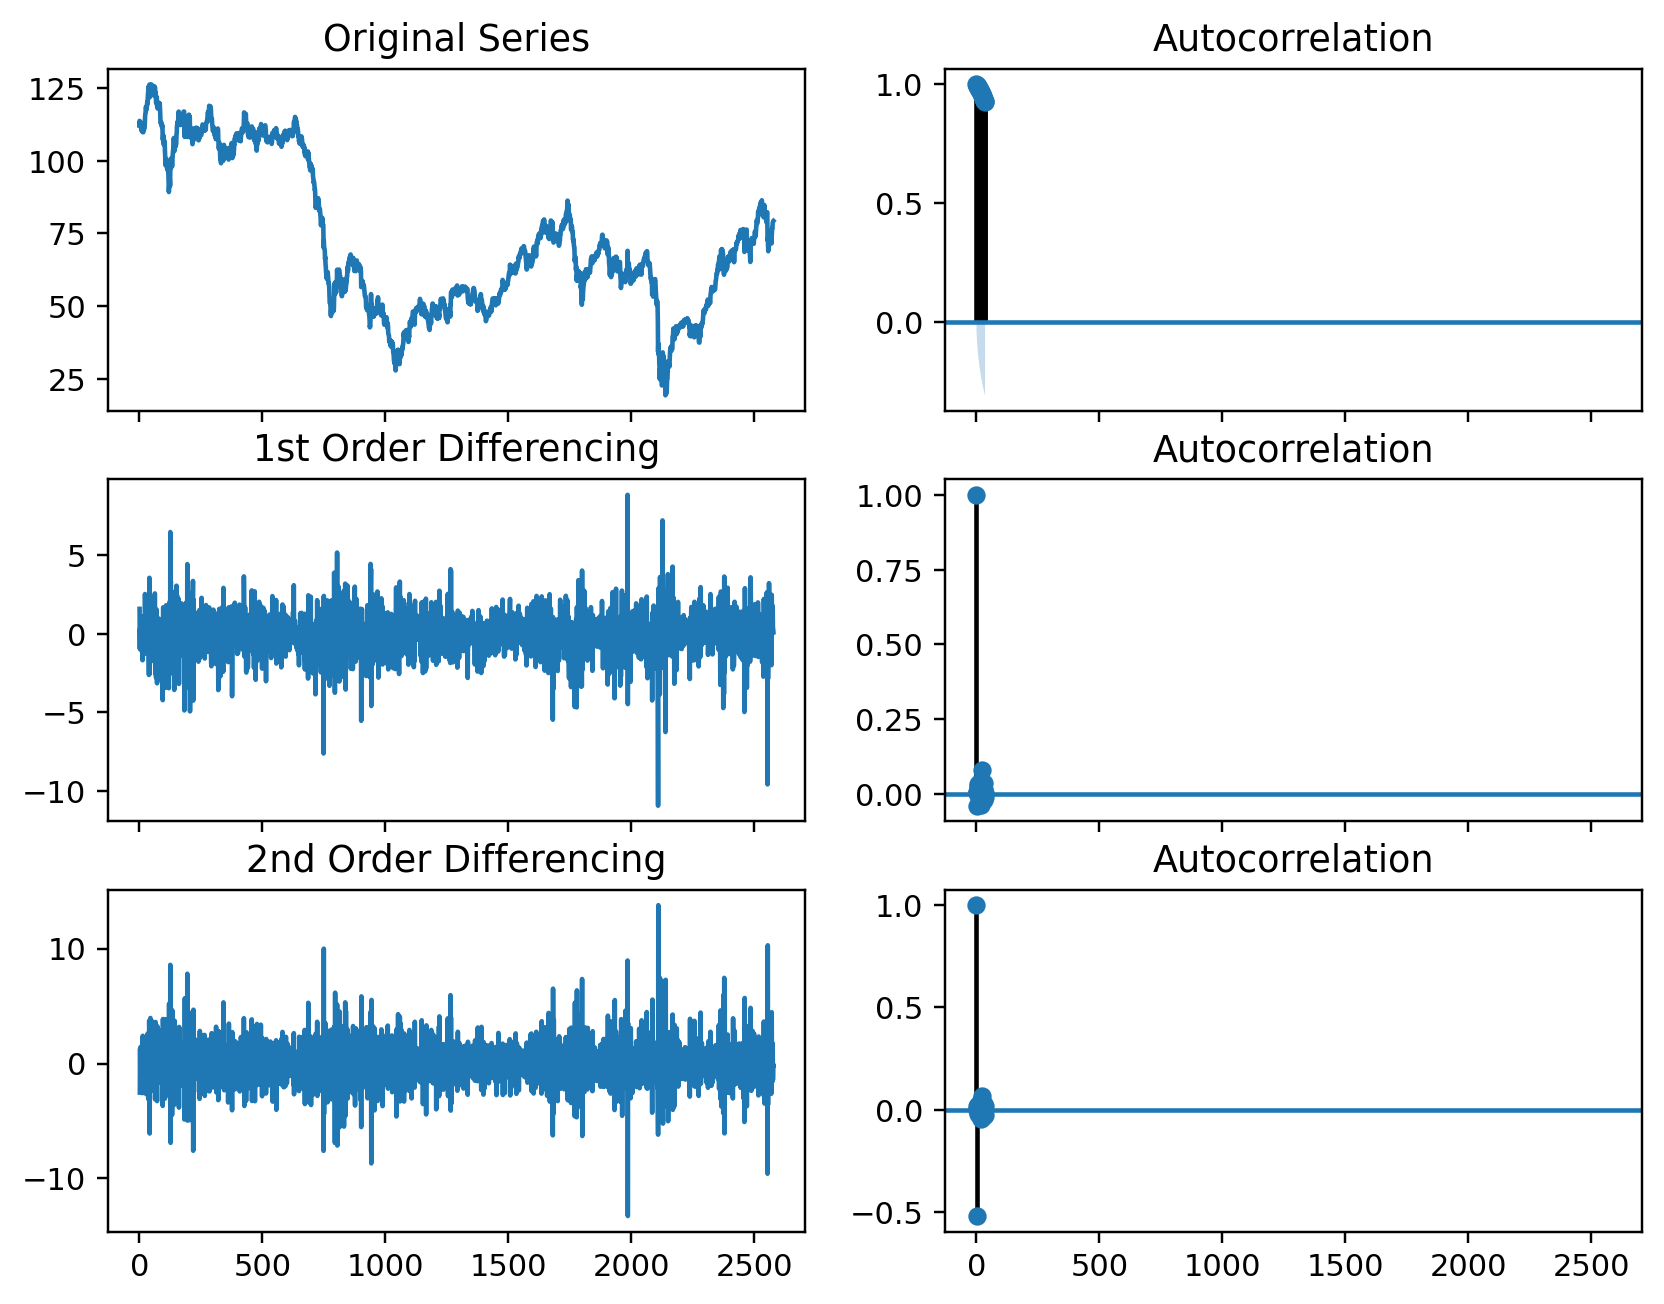

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':220})
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df["brent"].values); axes[0, 0].set_title('Original Series')
plot_acf(df["brent"].values, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df["brent"].diff().values); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df["brent"].diff().dropna().values, ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df["brent"].diff().diff().values); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df["brent"].diff().diff().dropna().values, ax=axes[2, 1])

plt.show()


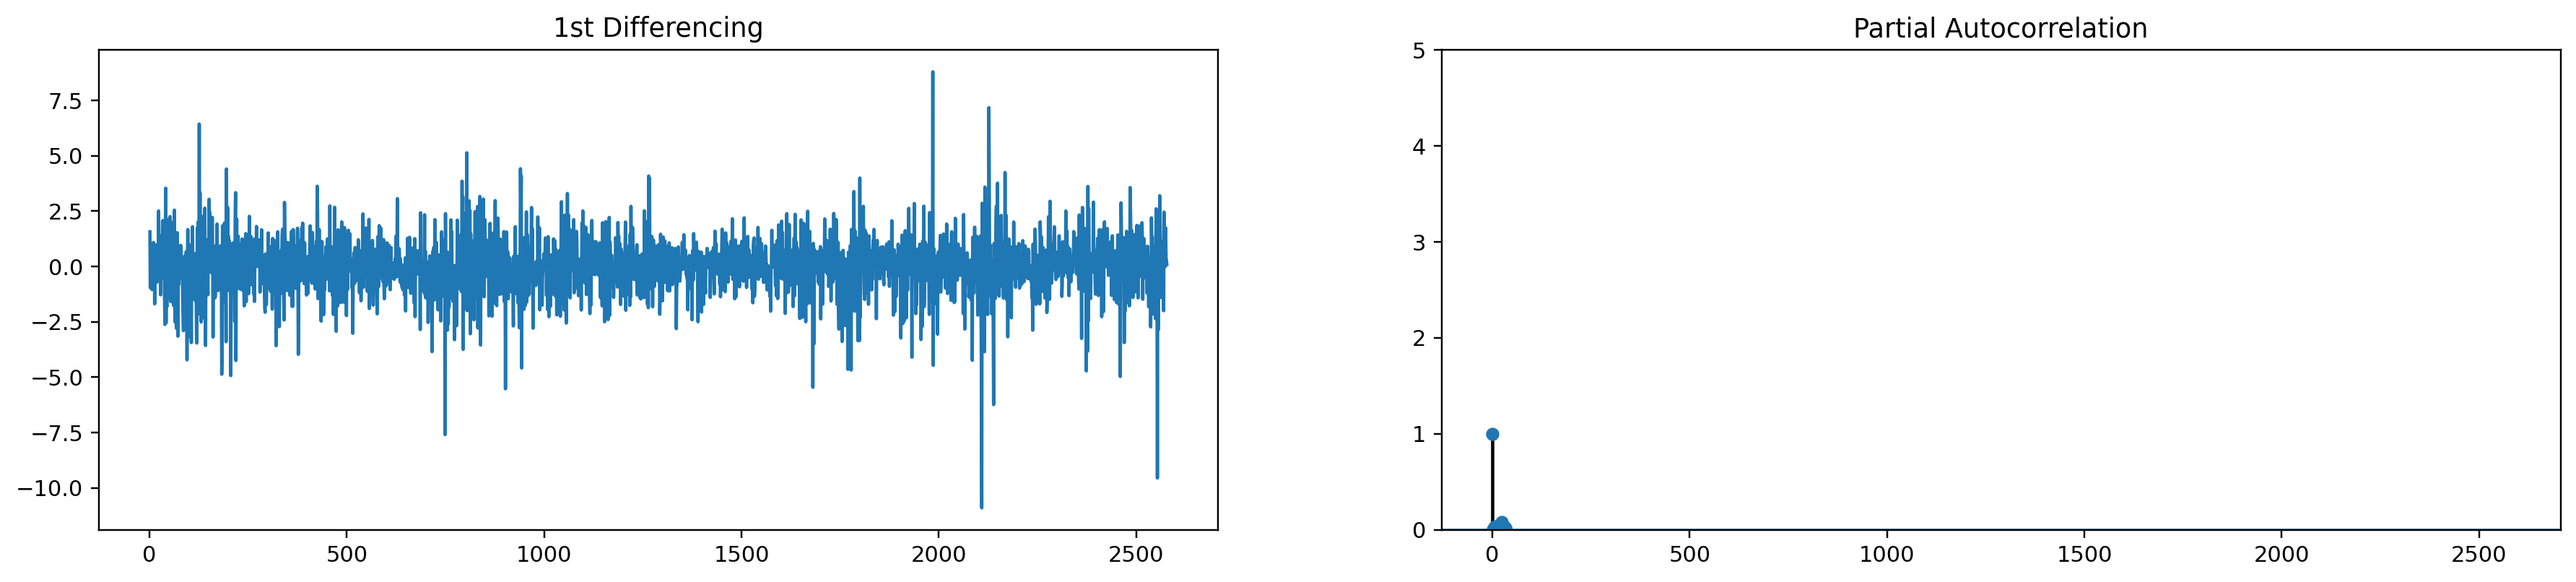

In [ ]:
plt.rcParams.update({'figure.figsize':(20,4), 'figure.dpi':220})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df["brent"].diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df["brent"].diff().dropna().values, ax=axes[1])

plt.show()

In [ ]:
model = ARIMA(df["brent"].values, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 2578
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4307.466
Method:                       css-mle   S.D. of innovations              1.286
Date:                Tue, 02 Aug 2022   AIC                           8622.931
Time:                        18:07:33   BIC                           8646.350
Sample:                             1   HQIC                          8631.420
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0128      0.024     -0.522      0.602      -0.061       0.035
ar.L1.D.y     -0.0797      0.437     -0.182      0.855      -0.936       0.777
ma.L1.D.y      0.0407      0.438      0.093      0.9

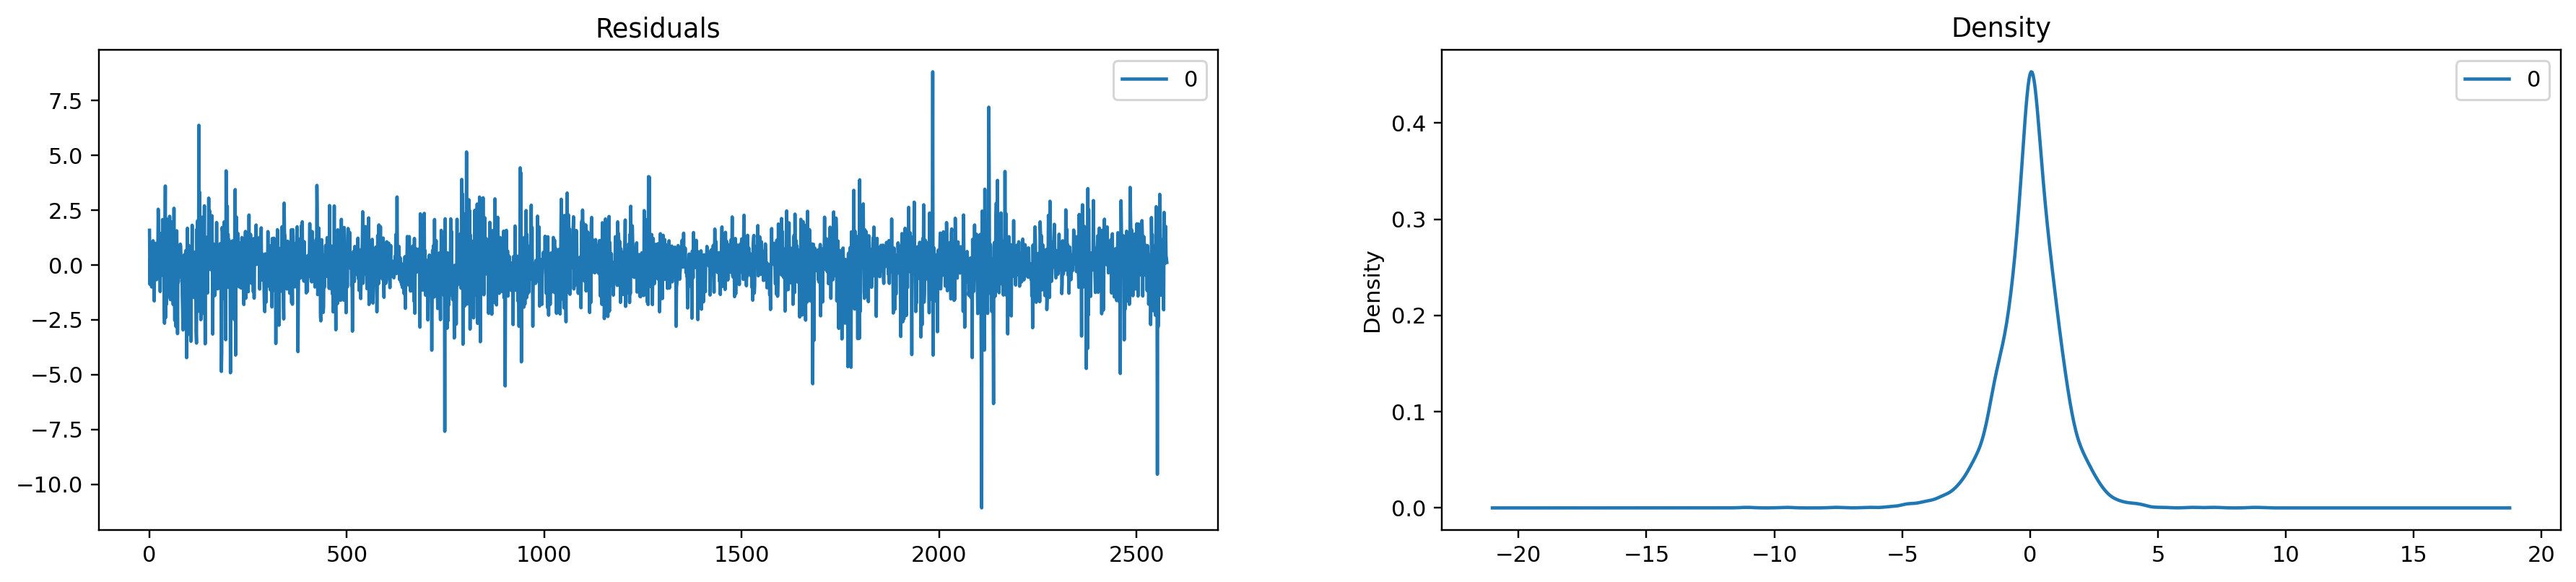

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# COMMENT - 6
## Some of the Autocorrelation plots will be improved for better visualisation such that stationarity can be interpreted. 

In [ ]:
# NOW LOOKING AT THEIR SPREAD!

In [ ]:
df["spread"] = df["wti"] - df["brent"]

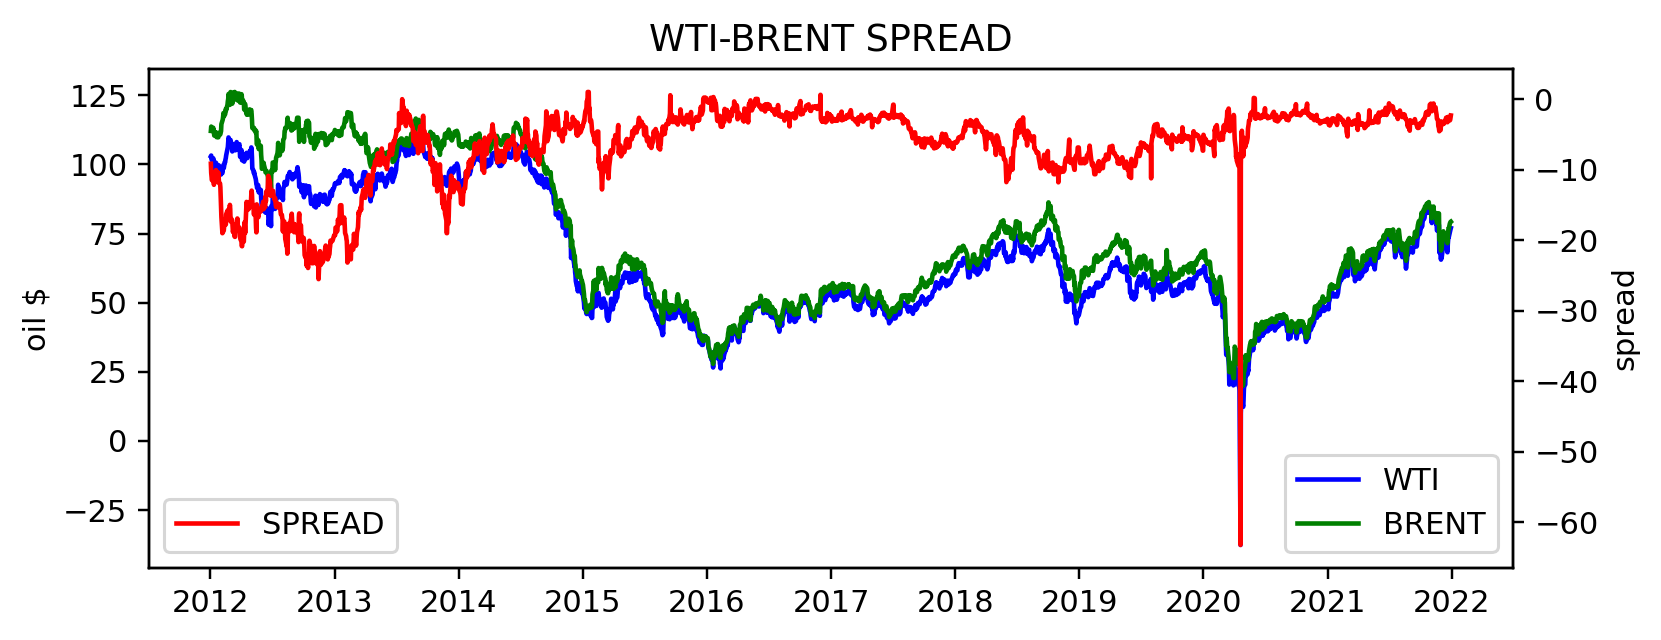

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,3))
t = df.index
ax.plot(t, df["wti"],label="WTI", color='b')
ax.plot(t, df["brent"],label="BRENT", color='g')
ax.set_ylabel("oil $")
ax.legend(["wti","brent"])
ax.legend(loc=4)

ax2 = ax.twinx()
ax2.plot(t, df["spread"],label="SPREAD", color='r')

ax2.set_ylabel("spread")
ax2.legend(["spread"])
ax2.legend(loc=3)
#plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.title('WTI-BRENT SPREAD')

#plt.xlabel('US Equity Timings 10 am - 4 pm')
#fig.tight_layout()
#plt.savefig(myInst,bbox_inches='tight')
plt.show()

# COMMENT - 7
### Highly negative spread is visible between 2020 to 2021 which may be due to the COVID factor.

In [ ]:
# statistical properties of spread

df["spread"].describe()

count    2579.000000
mean       -6.555704
std         5.318618
min       -63.200001
25%        -8.535000
50%        -5.119995
75%        -2.820000
max         1.000000
Name: spread, dtype: float64

In [ ]:
st.skew(df["spread"])

-1.7868909260965695

In [ ]:
st.kurtosis(df["spread"])

6.0438536773829235

In [ ]:
# CORRELATION OF SPREAD WITH original series

df.corr().iloc[:2,-1:]

,spread
wti,-0.551827
brent,-0.687735


In [ ]:
# CHECKING STATIONARITY of the SPREAD SERIES

result = adf(df["spread"].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.891115
p-value: 0.046391
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


We can see the p-value is less than threshold. We can consider spread to be stationary!

In [ ]:
# finding out its mean reversion nature using the HURST EXPONENT

H, c, data = compute_Hc(df["spread"].values, kind='random_walk', simplified=True)
print(H)

0.42127602239826584


As value of H is coming out to be close to 0.5, we can say that it exihibits a nature more inclining towards the brownian motion. 

# COMMNET - 8
### We can see the p-value is less than threshold. We can consider spread to be stationary!
### As value of H is coming out to be close to 0.5, we can say that it exihibits a nature more inclining towards the brownian motion.

In [ ]:
# Now comparing the prices of by-products with crude oil prices [ Natural Gas, Gasoline, Heating Oil]

GetFacebookInformation = yahooFinance.Ticker("NG=F")
ng = GetFacebookInformation.history(start=startDate,end=endDate)
ng = ng[["Close"]]
ng.columns = ["natgas"]

GetFacebookInformation = yahooFinance.Ticker("RB=F")
gs = GetFacebookInformation.history(start=startDate,end=endDate)
gs = gs[["Close"]]
gs.columns = ["gaso"]

GetFacebookInformation = yahooFinance.Ticker("HO=F")
ho = GetFacebookInformation.history(start=startDate,end=endDate)
ho = ho[["Close"]]
ho.columns = ["heatOil"]

dfs1 = [wti,brent,ng,gs,ho]
df1 = pd.concat(dfs1, axis=1)
df1.head()
df1.fillna(method='ffill', inplace=True)
df1.head()

,wti,brent,natgas,gaso,heatOil
Date,,,,,
2012-01-03,102.959999,112.129997,2.993,2.7486,3.0382
2012-01-04,103.220001,113.699997,3.096,2.7852,3.0899
2012-01-05,101.809998,112.739998,2.980,2.7365,3.0388
2012-01-06,101.559998,113.059998,3.062,2.7516,3.0702
2012-01-09,101.309998,112.449997,3.011,2.7590,3.0730


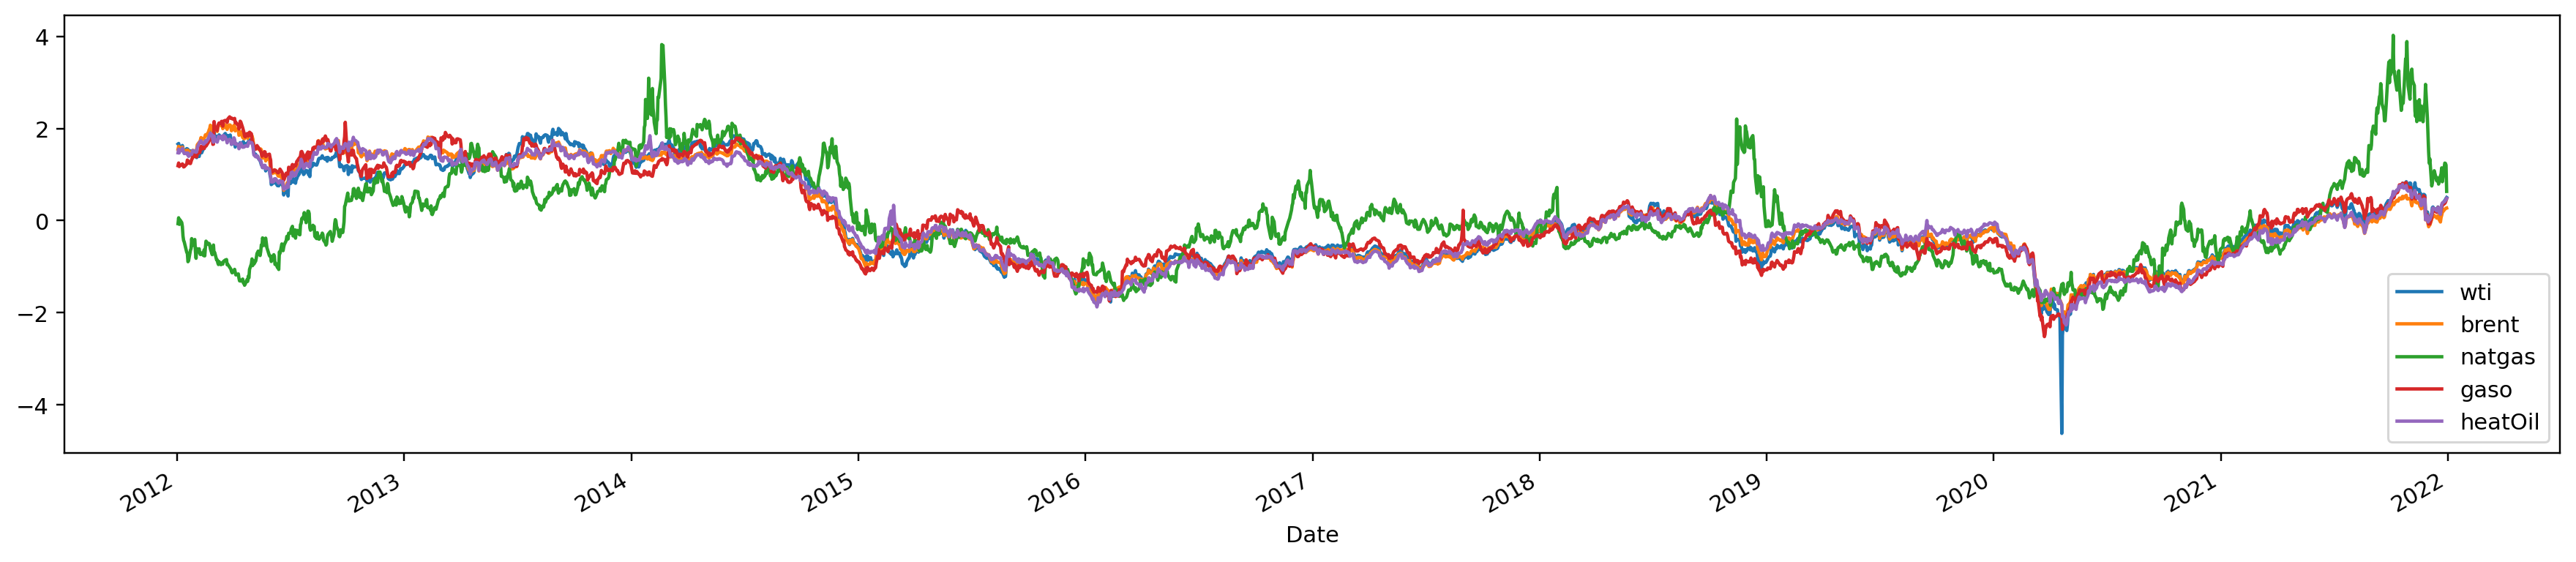

In [ ]:
norm_df1=(df1-df1.mean())/df1.std()
norm_df1 = norm_df1.reset_index()

norm_df1.plot(x="Date",y=norm_df1.columns[1:])

# COMMENT - 9 

In [ ]:
df1.corr()

,wti,brent,natgas,gaso,heatOil
wti,1.000000,0.985033,0.600639,0.970559,0.978702
brent,0.985033,1.000000,0.547747,0.973869,0.992203
natgas,0.600639,0.547747,1.000000,0.544973,0.582076
gaso,0.970559,0.973869,0.544973,1.000000,0.963430
heatOil,0.978702,0.992203,0.582076,0.963430,1.000000


# COMMENT - 10

In [ ]:
norm_df.head()

,Date,wti,brent,sp,nq,nifty,gold,vix
0,2012-01-03,1.666661,1.552759,-1.446642,-1.141494,-1.511017,0.733563,0.872925
1,2012-01-04,1.678306,1.613973,-1.446351,-1.137908,-1.516119,0.784540,0.762202
2,2012-01-05,1.615153,1.576543,-1.441800,-1.134884,-1.516021,0.815878,0.652955
3,2012-01-06,1.603956,1.589020,-1.445734,-1.131298,-1.514668,0.802089,0.527469
4,2012-01-09,1.592758,1.565236,-1.442236,-1.132845,-1.518353,0.766155,0.592426


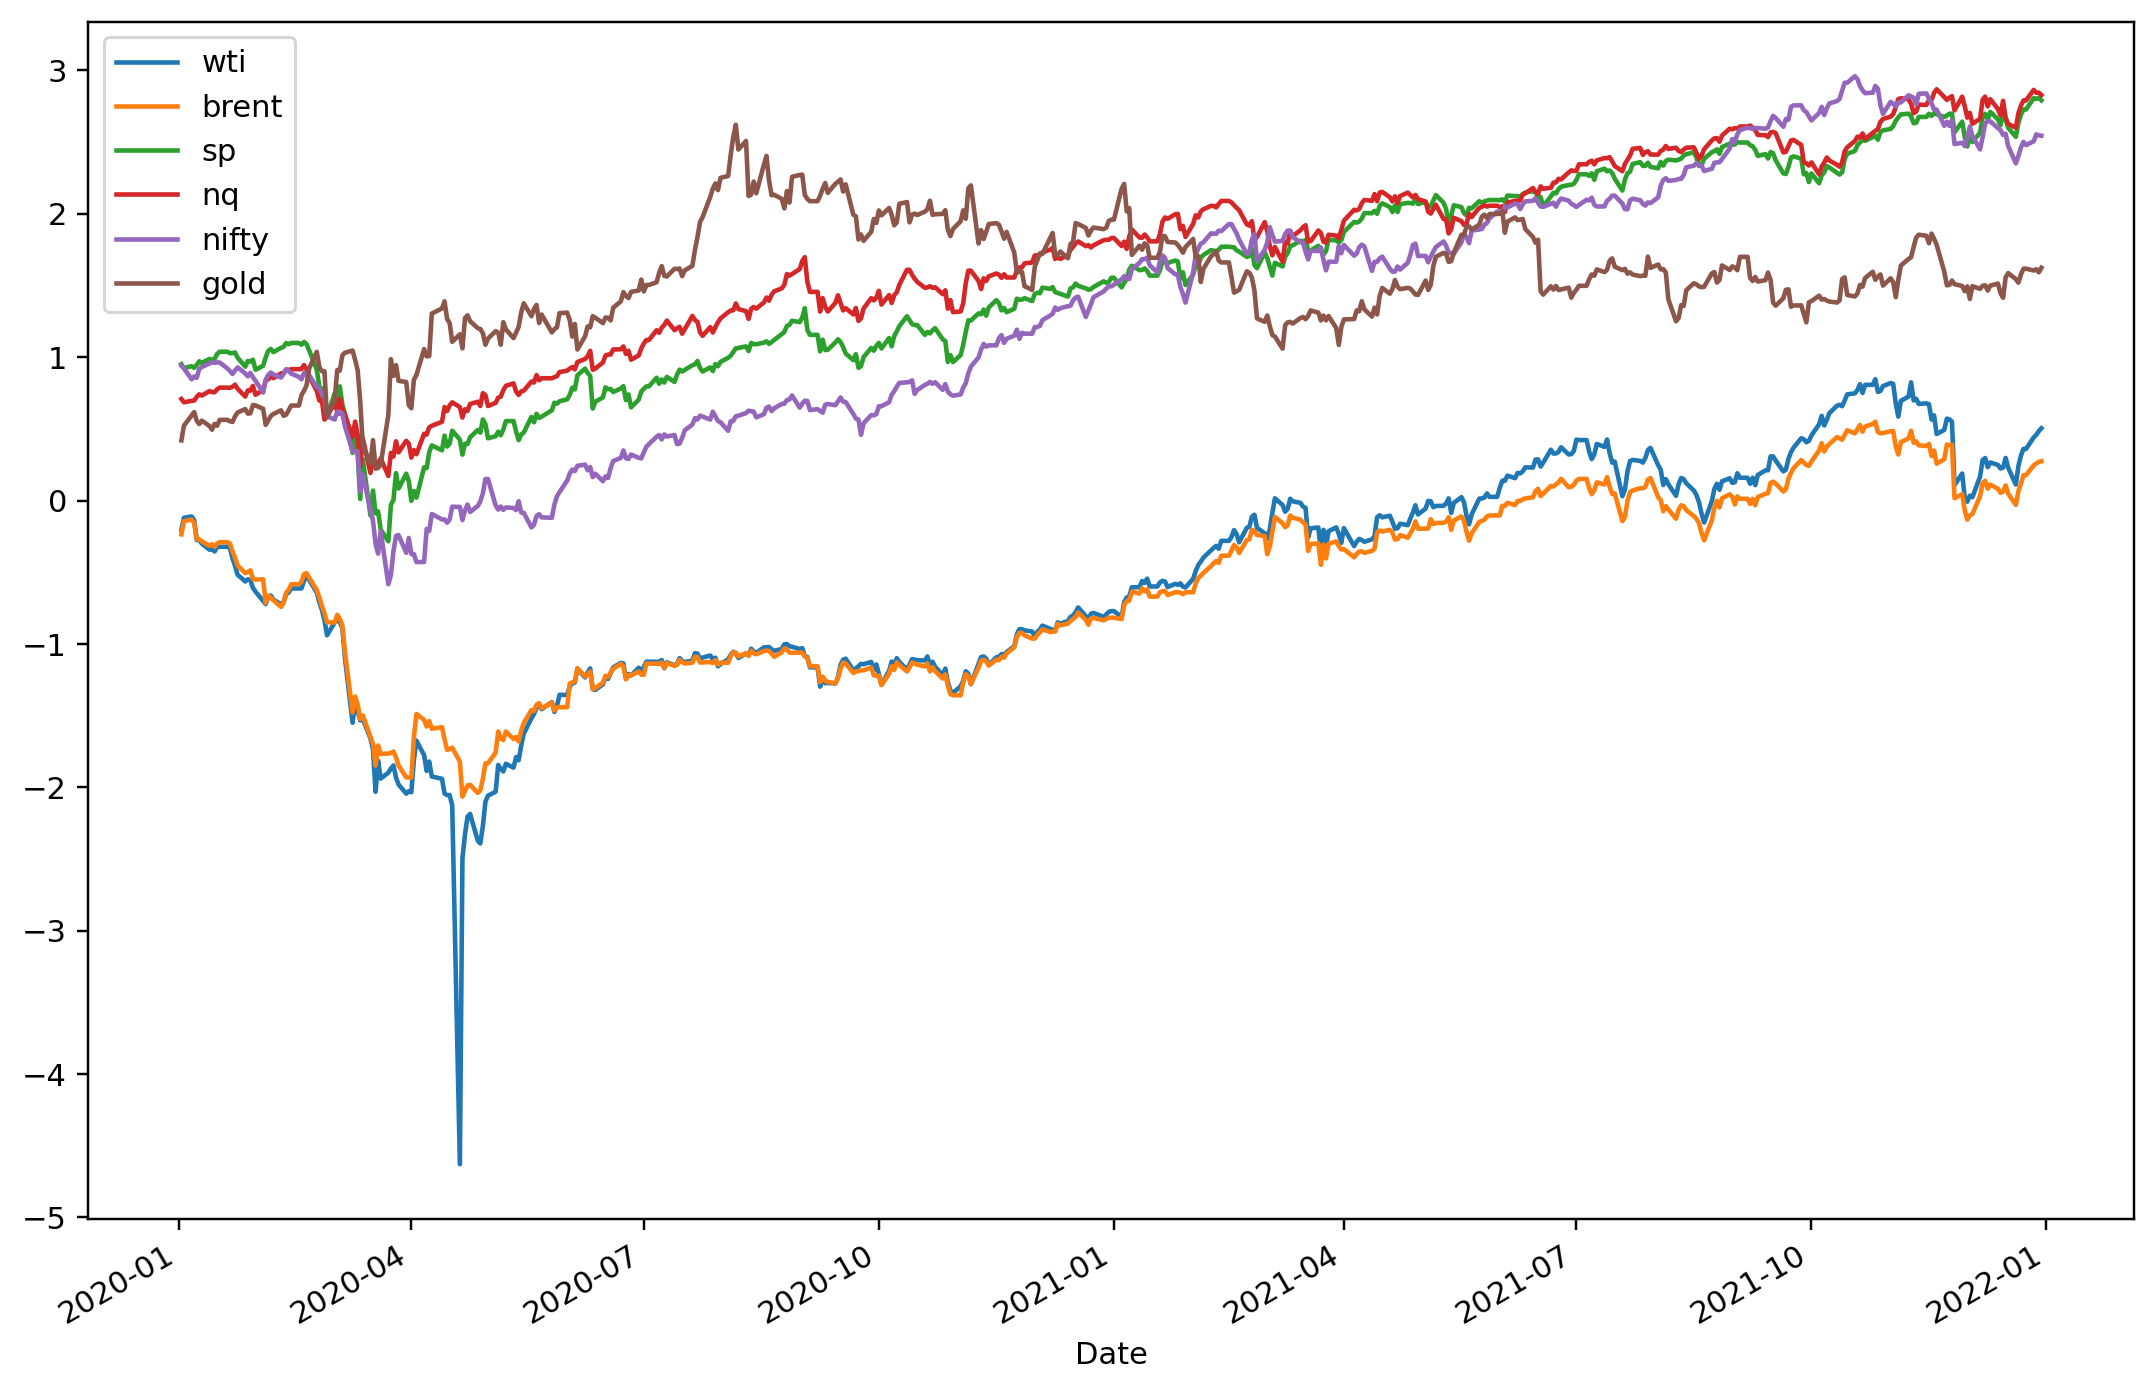

In [ ]:
# EFFECTS of COVID on the pricing and all

norm_df[norm_df["Date"]>'2020-01-01'].plot(x='Date', y=norm_df.columns[1:7],kind="line", figsize=(12, 8))

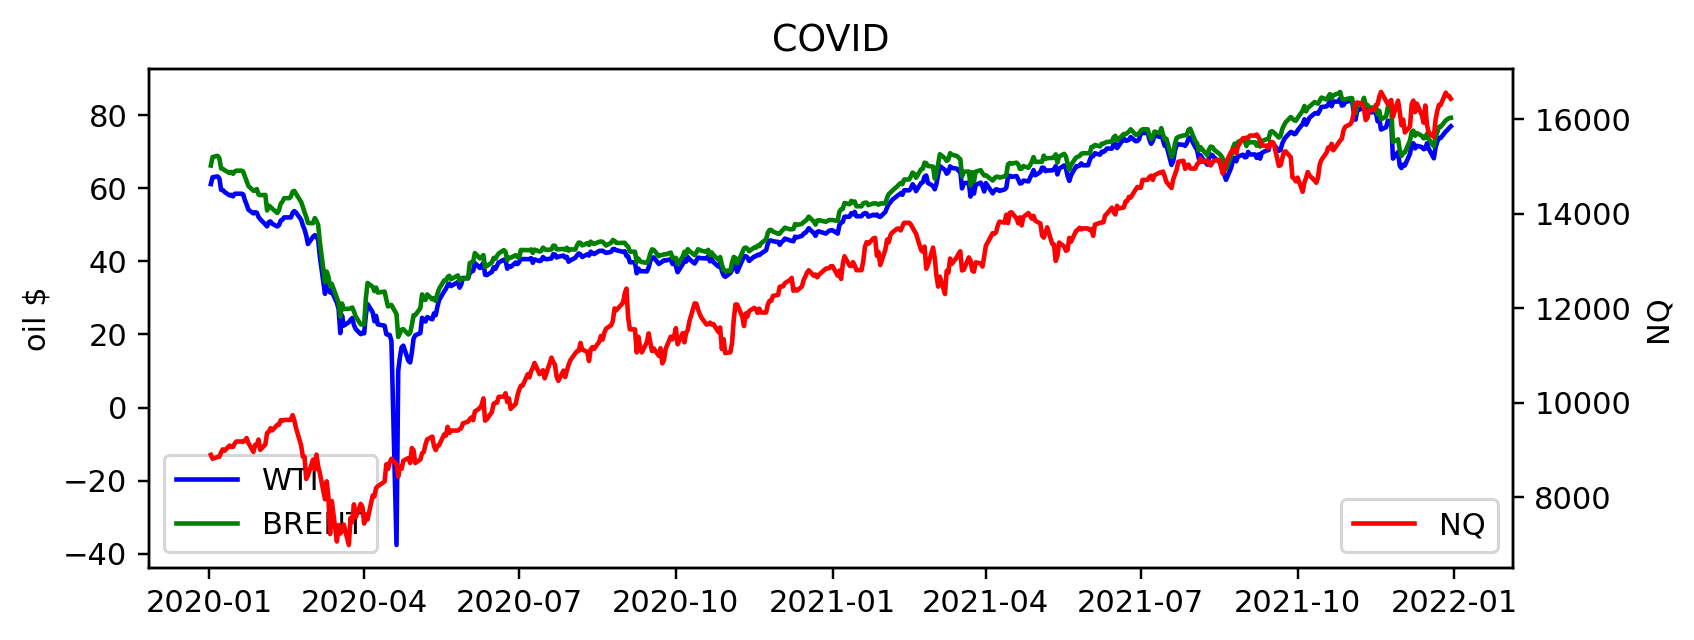

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,3))

df = df.reset_index()
df2 = df[df["Date"]>'2020-01-01']
t = df2.Date
ax.plot(t, df2["wti"],label="WTI", color='b')
ax.plot(t, df2["brent"],label="BRENT", color='g')
ax.set_ylabel("oil $")
ax.legend(["wti","brent"])
ax.legend(loc=3)

ax2 = ax.twinx()
ax2.plot(t, df2["nq"],label="NQ", color='r')

ax2.set_ylabel("NQ")
ax2.legend(["NQ"])
ax2.legend(loc=4)
#plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.title('COVID')

#plt.xlabel('US Equity Timings 10 am - 4 pm')
#fig.tight_layout()
#plt.savefig(myInst,bbox_inches='tight')
plt.show()

# COMMENT - 11

## write specically about what happened when price of oil got negative.

In [ ]:
# CHECKING STATIONARITY of the SPREAD SERIES before and After 2020
A = df[df["Date"]>'2020-01-01']

result = adf(A["spread"].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.519182
p-value: 0.000182
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [ ]:
A = df[df["Date"]<'2020-01-01']

result = adf(A["spread"].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.428975
p-value: 0.133725
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


# COMMENT - 12
### write how stationairty of spread changes before and after

In [ ]:
A = df[df["Date"]>'2020-01-01'].reset_index(drop=True)

# Equity returns in COVID
( A.loc[A.shape[0]-1,"nq"] -A.loc[0,"nq"])/A.loc[0,"nq"]

0.8478083616835831

In [ ]:
# OIL RETURNS in COVID
( A.loc[A.shape[0]-1,"wti"] -A.loc[0,"wti"])/A.loc[0,"wti"]

0.2584177423950787

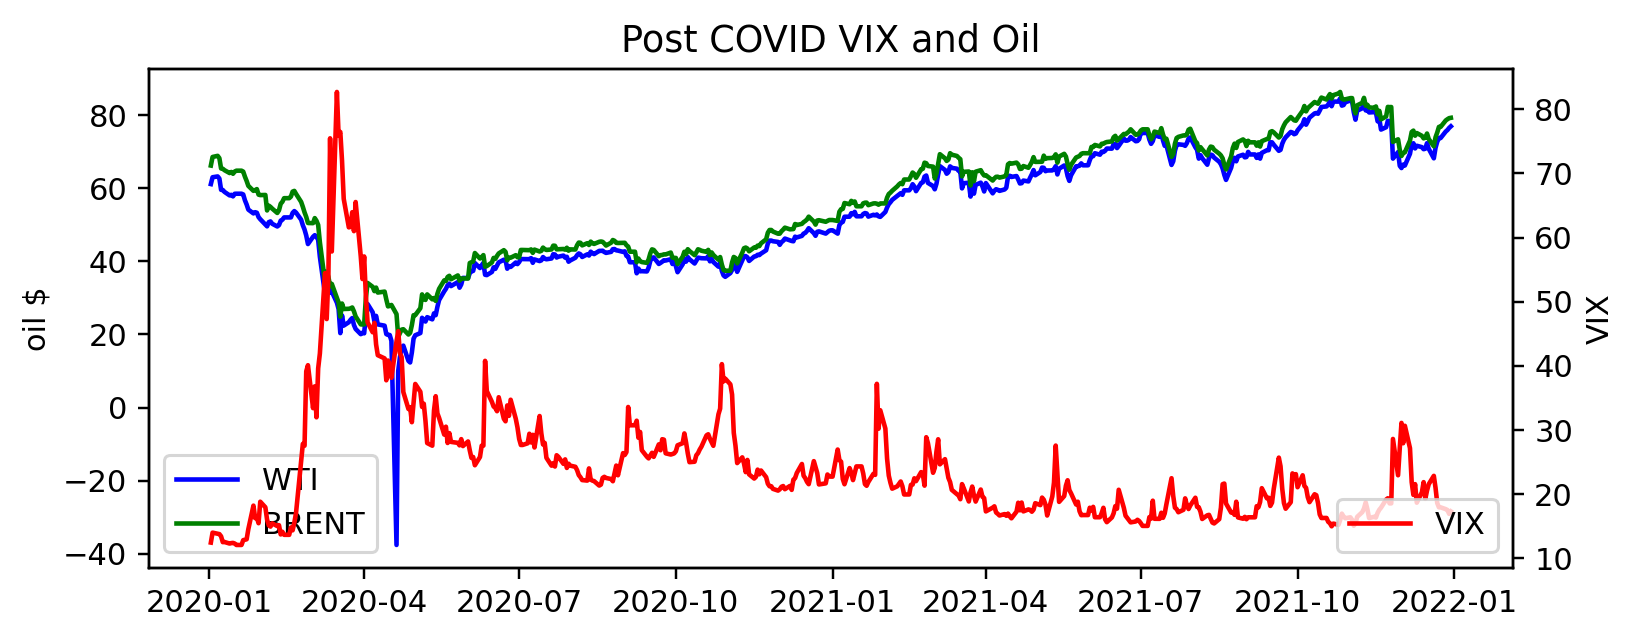

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,3))

#df = df.reset_index()
df2 = df[df["Date"]>'2020-01-01']
t = df2.Date
ax.plot(t, df2["wti"],label="WTI", color='b')
ax.plot(t, df2["brent"],label="BRENT", color='g')
ax.set_ylabel("oil $")
ax.legend(["wti","brent"])
ax.legend(loc=3)

ax2 = ax.twinx()
ax2.plot(t, df2["vix"],label="VIX", color='r')

ax2.set_ylabel("VIX")
ax2.legend(["VIX"])
ax2.legend(loc=4)
#plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
plt.title('Post COVID VIX and Oil')

#plt.xlabel('US Equity Timings 10 am - 4 pm')
#fig.tight_layout()
#plt.savefig(myInst,bbox_inches='tight')
plt.show()

In [ ]:
# CORRELATIONS in the covid times
df2.corr().iloc[2:4,-2:]

,vix,spread
sp,-0.685461,0.217361
nq,-0.610950,0.258399
